<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Define-x1,-x2" data-toc-modified-id="Define-x1,-x2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define x1, x2</a></span></li><li><span><a href="#Visualize-the-data" data-toc-modified-id="Visualize-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualize the data</a></span></li><li><span><a href="#Calculate-the-mean-and-sigma-of-x1-and-x2" data-toc-modified-id="Calculate-the-mean-and-sigma-of-x1-and-x2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate the mean and sigma of x1 and x2</a></span></li><li><span><a href="#Calculate-the-gaussian-distribution-p(x)" data-toc-modified-id="Calculate-the-gaussian-distribution-p(x)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculate the gaussian distribution p(x)</a></span></li><li><span><a href="#Visualize-the-p(x)" data-toc-modified-id="Visualize-the-p(x)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualize the p(x)</a></span></li><li><span><a href="#Establish-a-model-and-predict" data-toc-modified-id="Establish-a-model-and-predict-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Establish a model and predict</a></span></li><li><span><a href="#Make-prediction" data-toc-modified-id="Make-prediction-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Make prediction</a></span></li><li><span><a href="#Adjust-hyperparameters" data-toc-modified-id="Adjust-hyperparameters-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Adjust hyperparameters</a></span></li></ul></div>

# Anormaly Detection

## Load the data

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('anomaly_data.csv')
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


## Visualize the data

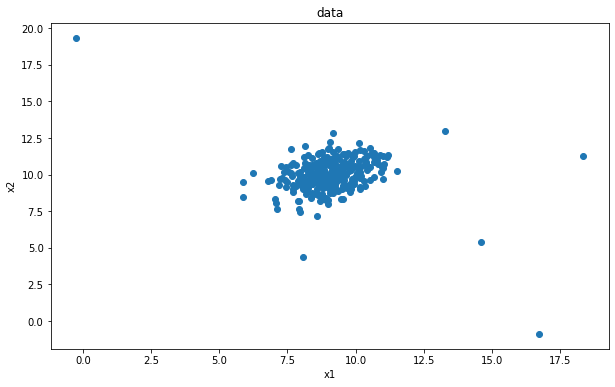

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(10,6))
plt.scatter(data.x1,data.x2)
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Define x1, x2

In [6]:
x1 = data.x1
x2 = data.x2

## Visualize the data

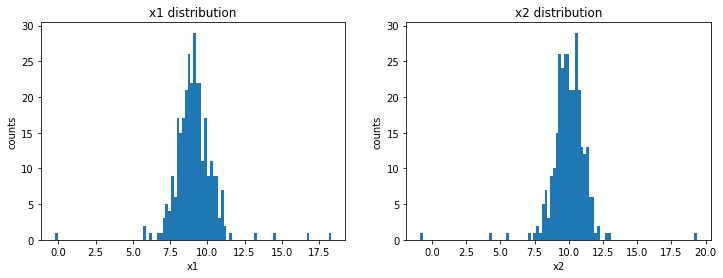

In [10]:
fig2 = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(x1, bins=100)
plt.title('x1 distribution')
plt.xlabel('x1')
plt.ylabel('counts')

plt.subplot(122)
plt.hist(x2, bins=100)
plt.title('x2 distribution')
plt.xlabel('x2')
plt.ylabel('counts')
plt.show()

## Calculate the mean and sigma of x1 and x2

In [11]:
x1_mean = x1.mean()
x1_sigma = x1.std()
x2_mean = x2.mean()
x2_sigma = x2.std()
print(x1_mean,x1_sigma,x2_mean,x2_sigma)

9.112225783931596 1.3559573758220915 9.997710507954396 1.3097071175386399


## Calculate the gaussian distribution p(x)

In [14]:
from scipy.stats import norm
x1_range = np.linspace(0,20,300)
x1_norm = norm.pdf(x1_range,x1_mean, x1_sigma)
x2_range = np.linspace(0,20,300)
x2_norm = norm.pdf(x2_range,x2_mean, x2_sigma)

## Visualize the p(x)

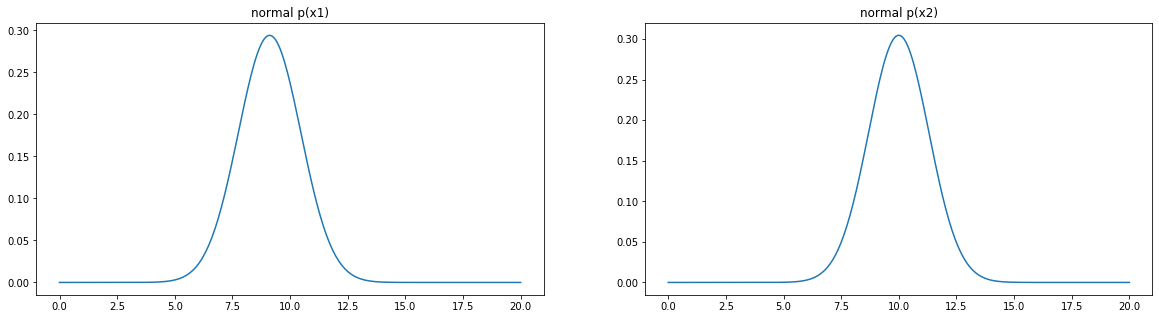

In [16]:
fig2 = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(x1_range, x1_norm)
plt.title('normal p(x1)')

plt.subplot(122)
plt.plot(x2_range, x2_norm)
plt.title('normal p(x2)')

plt.show()

## Establish a model and predict

In [22]:
from sklearn.covariance import EllipticEnvelope
ad_model= EllipticEnvelope()
ad_model.fit(data)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=None)

This is an supervised learning, so just drop the data in tho model and train

## Make prediction

In [23]:
y_predicted = ad_model.predict(data)
pd.value_counts(y_predicted)

 1    276
-1     31
dtype: int64

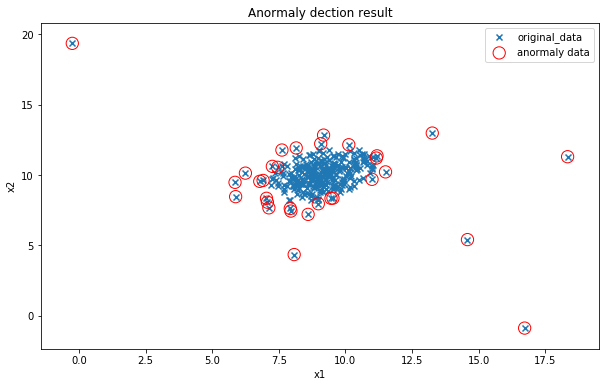

In [33]:
#visualize the result
fig4 = plt.figure(figsize=(10,6))
original = plt.scatter(data.x1,data.x2, marker='x')
anormaly = plt.scatter(data.x1[y_predicted==-1] ,data.x2[y_predicted==-1],
           marker='o',facecolor ='none',s=150,edgecolors='red')
plt.title('Anormaly dection result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((original,anormaly), ("original_data",'anormaly data'))
plt.show()

## Adjust hyperparameters

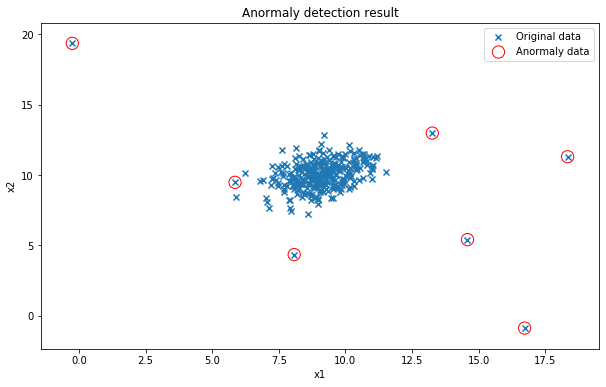

In [41]:
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(data)
y_predicted = ad_model.predict(data)
fig5 = plt.figure(figsize=(10,6))
original = plt.scatter(x1,x2, marker='x')
anormaly = plt.scatter(x1[y_predicted==-1], x2[y_predicted==-1],
                      marker='o', facecolor='none', edgecolor='r', s=150)
plt.title('Anormaly detection result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((original,anormaly),('Original data','Anormaly data'))

plt.show()